# Importing the needed libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

import numpy as np
from sklearn.model_selection import train_test_split

# Reading the data set

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Identifying missing values and dealing with them

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Distribution of the target column (charges)

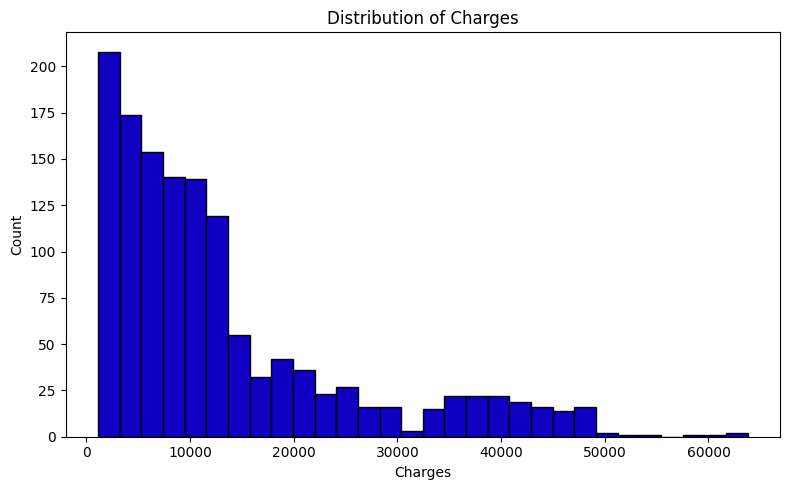

In [5]:
plt.figure(figsize=(8, 5))
plt.hist(df["charges"], bins=30, edgecolor="black", color="#1000c2")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.title("Distribution of Charges")
plt.tight_layout()
plt.show()


# Removing unneeded features

In [6]:
# Commented out features are the extracted ones
df = df.drop(columns=[
                      # 'age', 
                      # 'sex',
                      # 'bmi',
                      # 'children',
                      # 'smoker',
                      'region',
                      ])

# Encoding Catagorical Data

In [7]:
# Features and target
X = df.drop(columns=["charges"])
y = df["charges"]
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)

      age     sex     bmi  children smoker
560    46  female  19.950         2     no
1285   47  female  24.320         0     no
1142   52  female  24.860         0     no
969    39  female  34.320         5     no
486    54  female  21.470         3     no
...   ...     ...     ...       ...    ...
1095   18  female  31.350         4     no
1130   39  female  23.870         5     no
1294   58    male  25.175         0     no
860    37  female  47.600         2    yes
1126   55    male  29.900         0     no

[1070 rows x 5 columns]


#### Encoding X

In [8]:
# Identify columns
numeric_cols = [
  "age", 
  "bmi",
  "children"
]

boolean_cols = [
  # "smoker"
]

categorical_cols = X.columns.drop(labels=numeric_cols + boolean_cols).tolist()

# ColumnTransformer: correct encoding
ct = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols),
        ("bool", OrdinalEncoder(), boolean_cols)
    ]
)

# Fit/transform
X_train_processed = ct.fit_transform(X_train)
X_test_processed = ct.transform(X_test)

#### Encoding y

In [9]:
# No encoding needed for y

# Training The Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

lr = LinearRegression()
lr.fit(X_train_processed, y_train)

# Predict
y_pred = lr.predict(X_test_processed)

# Metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("\n")

print("First 10 Actual vs Predicted Charges values:")
print("============================================")
for i in range(10):
    print(f"Actual: {y_test.iloc[i]}  |  Predicted: {y_pred[i]}")


R2 Score: 0.7811302113434097
RMSE: 5829.172930254189


First 10 Actual vs Predicted Charges values:
Actual: 9095.06825  |  Predicted: 8554.817115888562
Actual: 5272.1758  |  Predicted: 6973.587467448897
Actual: 29330.98315  |  Predicted: 36798.60416104231
Actual: 9301.89355  |  Predicted: 9417.882823025833
Actual: 33750.2918  |  Predicted: 26871.680310814554
Actual: 4536.259  |  Predicted: 11097.383839380904
Actual: 2117.33885  |  Predicted: 145.27608963230523
Actual: 14210.53595  |  Predicted: 16746.168377102887
Actual: 3732.6251  |  Predicted: 747.534141909513
Actual: 10264.4421  |  Predicted: 11153.675907223995


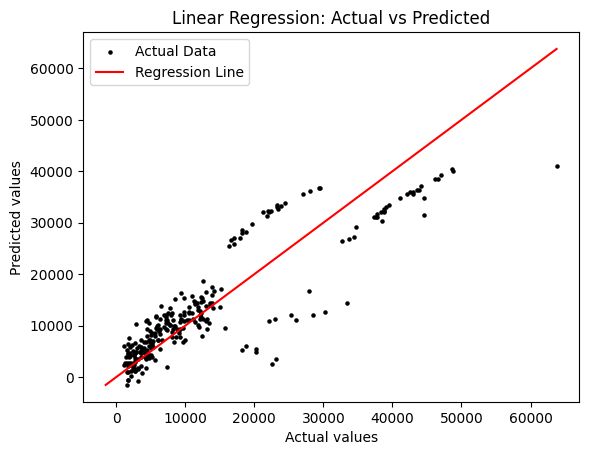

In [11]:
plt.figure()
plt.scatter(y_test, y_pred, s=5, label="Actual Data", color='black')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Linear Regression: Actual vs Predicted")


min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], label="Regression Line", color='red')

plt.legend()
plt.show()

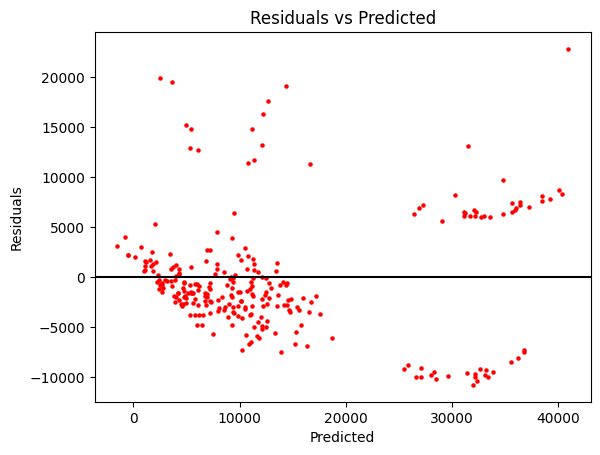

In [12]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals, s=5, color='red')
plt.axhline(0, color='black')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

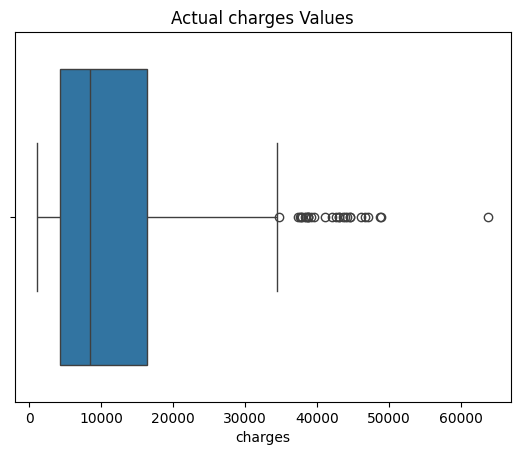

In [18]:
df_test = pd.DataFrame(y_test, columns=["charges"])
df_pred = pd.DataFrame(y_pred, columns=["charges"])
import seaborn as sns
sns.boxplot(x= df_test["charges"])
plt.title('Actual charges Values')
plt.show()

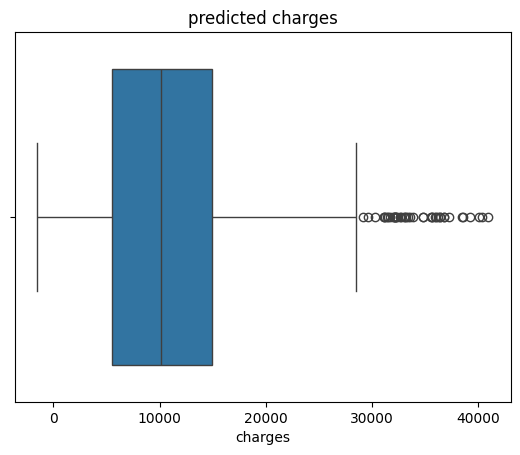

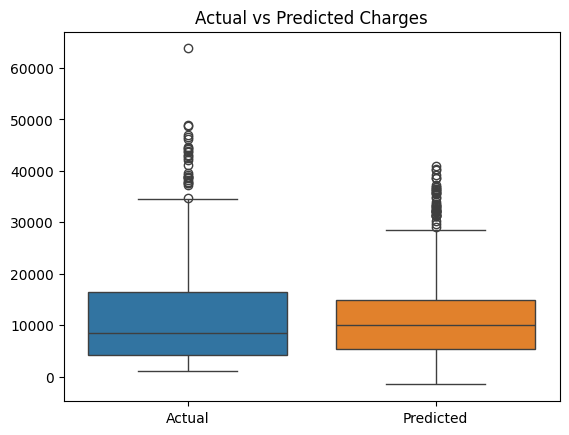

In [19]:
df_selected = df_pred["charges"]
sns.boxplot(x=df_selected)
plt.title('predicted charges')
plt.show()

df_compare = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

sns.boxplot(data=df_compare)
plt.title("Actual vs Predicted Charges")
plt.show()


# Training The KNN Regressor Model

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

knr = KNeighborsRegressor(n_neighbors=11)
knr.fit(X_train_processed, y_train)

# Predict
y_pred = knr.predict(X_test_processed)

# Metrics for regression
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE: ", root_mean_squared_error(y_test, y_pred))
# print("MSE:", mean_squared_error(y_test, y_pred))
print("\n")

print("First 10 Actual vs Predicted Charges values:")
print("============================================")
for i in range(10):
    print(f"Actual: {y_test.iloc[i]}  |  Predicted: {y_pred[i]}")

R2 Score: 0.8249128499031824
RMSE:  5213.64152517611


First 10 Actual vs Predicted Charges values:
Actual: 9095.06825  |  Predicted: 9235.773468181818
Actual: 5272.1758  |  Predicted: 5212.744818181818
Actual: 29330.98315  |  Predicted: 27903.093631818178
Actual: 9301.89355  |  Predicted: 8908.697322727274
Actual: 33750.2918  |  Predicted: 31299.684213636363
Actual: 4536.259  |  Predicted: 6843.879458181818
Actual: 2117.33885  |  Predicted: 4506.439585454545
Actual: 14210.53595  |  Predicted: 13614.367945454544
Actual: 3732.6251  |  Predicted: 3225.6531499999996
Actual: 10264.4421  |  Predicted: 9981.314518181818


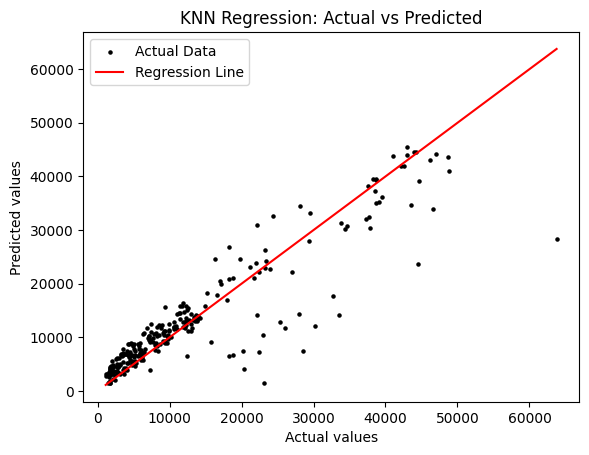

In [22]:
plt.figure()
plt.scatter(y_test, y_pred, s=5, label="Actual Data", color='black')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("KNN Regression: Actual vs Predicted")


min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], label="Regression Line", color='red')

plt.legend()
plt.show()

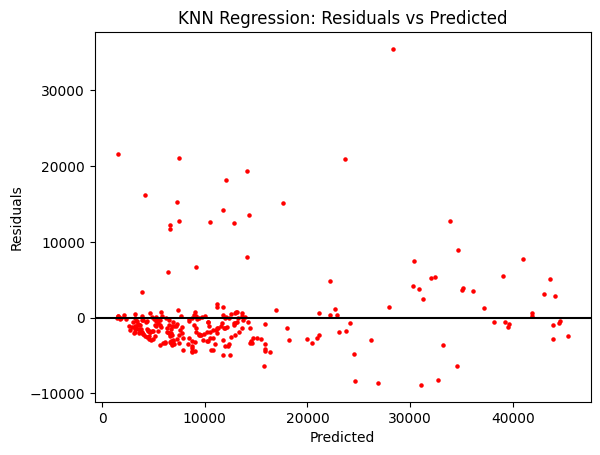

In [23]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals, s=5, color='red')
plt.axhline(0, color='black')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("KNN Regression: Residuals vs Predicted")
plt.show()

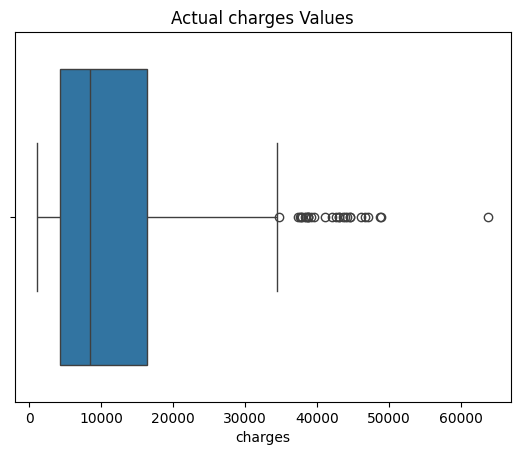

In [24]:
df_test = pd.DataFrame(y_test, columns=["charges"])
df_pred = pd.DataFrame(y_pred, columns=["charges"])
import seaborn as sns
sns.boxplot(x= df_test["charges"])
plt.title('Actual charges Values')
plt.show()

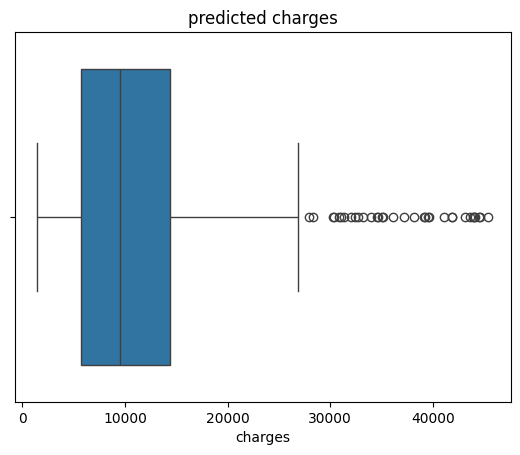

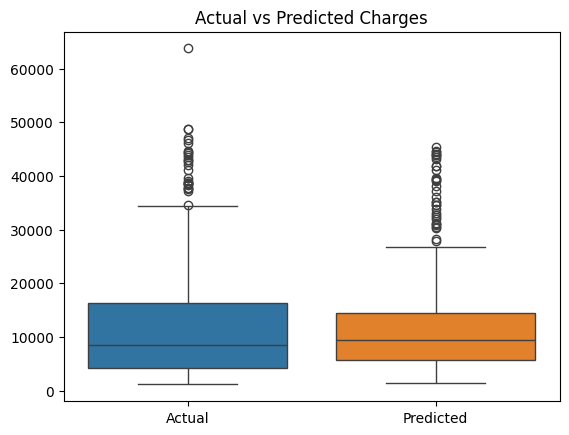

In [25]:
df_selected = df_pred["charges"]
sns.boxplot(x=df_selected)
plt.title('predicted charges')
plt.show()

df_compare = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

sns.boxplot(data=df_compare)
plt.title("Actual vs Predicted Charges")
plt.show()
